In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



In [11]:
# Load the image
image = cv2.imread('noface.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



In [12]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)

# Perform edge detection
edges = cv2.Canny(gray_blur, 30, 100)

# Find contours in the edge image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours (adjust the area threshold as needed)
min_face_area = 2000
faces = []


In [13]:

for contour in contours:
    if cv2.contourArea(contour) > min_face_area:
        faces.append(contour)

# Draw rectangles around the detected faces
for face in faces:
    x, y, w, h = cv2.boundingRect(face)
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)




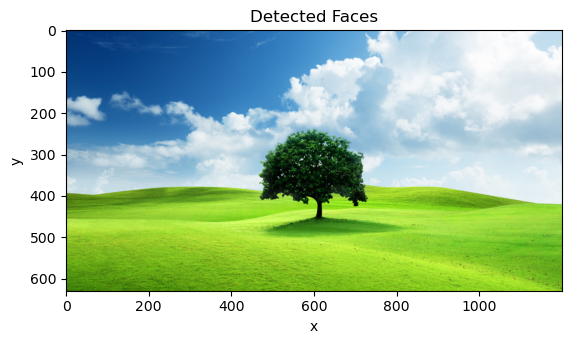

In [14]:
# Display the image using Matplotlib
fig, ax = plt.subplots()
ax.imshow(image_rgb)
ax.set_title('Detected Faces')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()